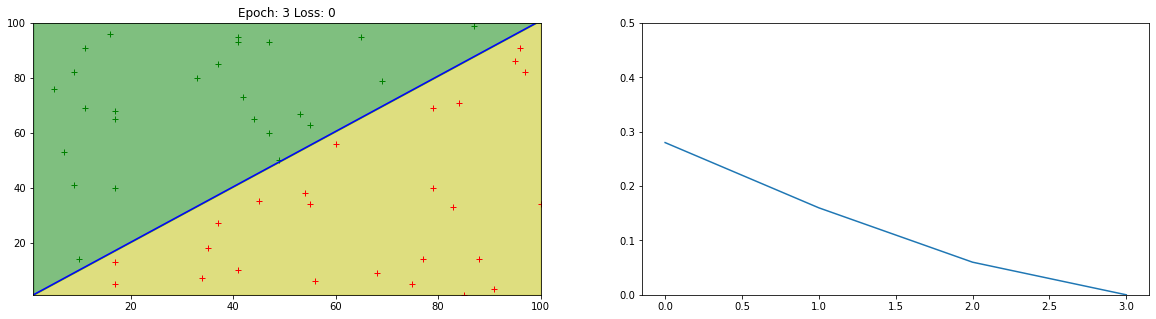

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from scipy.signal import savgol_filter
from IPython import display

df = pd.read_csv('data1.csv')
x1 = df['x1'].values.tolist()
x2 = df['x2'].values.tolist()
y = df['y'].values.tolist()

w = [random.random(), random.random()]
b = random.random()
lr = 0.1
theta = 0.5
epoch = 0
count = 0
loss = []

while count < len(y):
    total_error = 0
    for i in range(len(y)):
        ws = w[0]*x1[i] + w[1]*x2[i] + b
        pred = 0
        if ws > theta:
            pred = 1
            
        error = y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            w[0] += error*x1[i]*lr
            w[1] += error*x2[i]*lr
            b += error*lr
        else:
            count += 1
            
    loss.append(1/len(x1)*total_error)
    grf = plt.figure(figsize=(20,5))
    ax = grf.add_subplot(1,2,1)
    display.clear_output(wait=True)
    for i in range(len(y)):
        if y[i] == 0:
            plt.plot(x1[i], x2[i], 'r+')
        else:
            plt.plot(x1[i], x2[i], 'g+')
        
        plt.xlim([1,100])
        plt.ylim([1,100])
        
        xint = (theta-b)/ w[0]
        yint = (theta-b)/ w[1]
        slope = -yint/xint
        X = plt.xlim()
        Y = []
        for i in X:
            Y.append(slope*i + yint)
            
    ax.plot(X,Y, 'b-')
    ax.fill_between(X, Y, plt.xlim()[0], color='y', alpha= 0.5)
    ax.fill_between(X, Y, plt.ylim()[1], color='g', alpha = 0.5)
    plt.title(f"Epoch: {epoch} Loss: {total_error}")
    plt.subplot(1,2,2)
    plt.plot(loss)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3)
        plt.plot(avg, 'r--', lw=5)
    
    plt.ylim([0,0.5])
    plt.show()
    epoch += 1
    

#ax.fill_between(X, Y,plt.xlim()[0], color='y', alpha= 0.5)
#ax.fill_between(X, Y, plt.ylim()[1], color='g', alpha = 0.5)
#plt.show()